In [10]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
# https://books.google.ca/books?id=_ATpBwAAQBAJ&lpg=PA201&ots=rinZM8jQ6s&dq=hoeffding%20bound%20gives%20probability%20%22greater%20than%201%22&pg=PA201#v=onepage&q&f=false
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [13]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0.
    self.N = 0. # num samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [14]:
def ucb(mean, n, nj):
  return mean + np.sqrt(2*np.log(n) / nj)

In [15]:
def run_experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
  rewards = np.empty(NUM_TRIALS)
  total_plays = 0

  # initialization: play each bandit once
  for j in range(len(bandits)):
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

  for i in range(NUM_TRIALS):
    j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

    # for the plot
    rewards[i] = x
  cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

  # plot moving average ctr
  plt.title('cumulative_average on log xscale')
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.xscale('log')
  plt.show()

  # plot moving average ctr linear
  plt.title('cumulative_average on linear xscale')
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

  for b in bandits:
    print(b.p_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  return cumulative_average

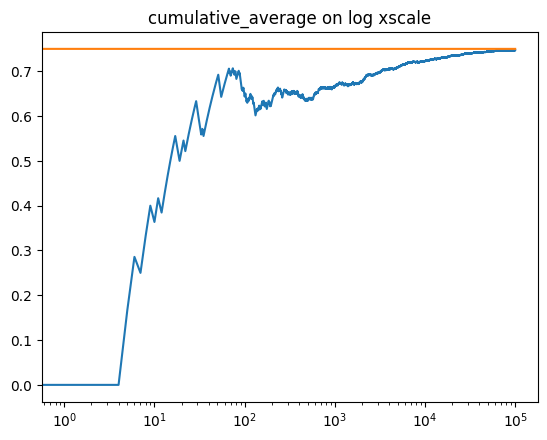

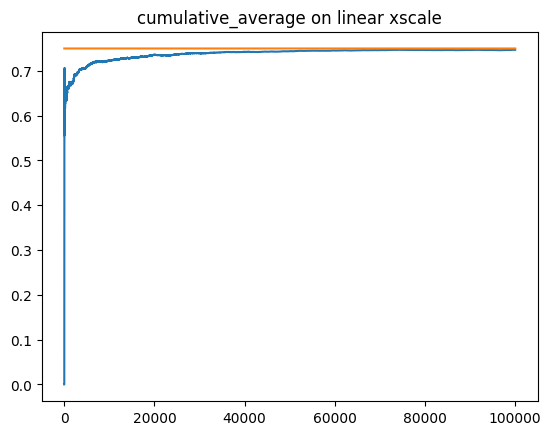

0.2608695652173913
0.5415778251599154
0.7484061060718767
total reward earned: 74700.0
overall win rate: 0.747
num times selected each bandit: [92.0, 469.0, 99442.0]


In [16]:
if __name__ == '__main__':
  run_experiment()